In [1]:
library(tidyverse)
library(patchwork)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
df <- read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/steak-survey/steak-risk-survey.csv")
steak <- df %>% filter(`Do you eat steak?` == "Yes")
steak$`How do you like your steak prepared?` <- factor(steak$`How do you like your steak prepared?`, 
                                                       levels = c('Rare', 'Medium rare', 'Medium', 'Medium Well', 'Well'))

Parsed with column specification:
cols(
  RespondentID = col_double(),
  `Consider the following hypothetical situations: <br>In Lottery A, you have a 50% chance of success, with a payout of $100. <br>In Lottery B, you have a 90% chance of success, with a payout of $20. <br><br>Assuming you have $10 to bet, would you play Lottery A or Lottery B?` = col_character(),
  `Do you ever smoke cigarettes?` = col_character(),
  `Do you ever drink alcohol?` = col_character(),
  `Do you ever gamble?` = col_character(),
  `Have you ever been skydiving?` = col_character(),
  `Do you ever drive above the speed limit?` = col_character(),
  `Have you ever cheated on your significant other?` = col_character(),
  `Do you eat steak?` = col_character(),
  `How do you like your steak prepared?` = col_character(),
  Gender = col_character(),
  Age = col_character(),
  `Household Income` = col_character(),
  Education = col_character(),
  `Location (Census Region)` = col_character()
)



# Introduction
This dataset tried to connect how risky behavior to how a person how a person likes their steak prepared. The first step was to filter the data by the people who eat steak, because those who do not eat steak do not provide much insight. Below is a preview of the questions they asked and how a certain person likes their steak done.

In [3]:
steak %>% head

RespondentID,"Consider the following hypothetical situations: <br>In Lottery A, you have a 50% chance of success, with a payout of $100. <br>In Lottery B, you have a 90% chance of success, with a payout of $20. <br><br>Assuming you have $10 to bet, would you play Lottery A or Lottery B?",Do you ever smoke cigarettes?,Do you ever drink alcohol?,Do you ever gamble?,Have you ever been skydiving?,Do you ever drive above the speed limit?,Have you ever cheated on your significant other?,Do you eat steak?,How do you like your steak prepared?,Gender,Age,Household Income,Education,Location (Census Region)
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>
3234982343,Lottery A,No,Yes,No,No,No,No,Yes,Medium rare,Male,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central
3234973379,Lottery A,No,Yes,Yes,No,Yes,Yes,Yes,Rare,Male,> 60,"$150,000+",Graduate degree,South Atlantic
3234972383,Lottery B,Yes,Yes,Yes,No,Yes,Yes,Yes,Medium,Male,> 60,"$50,000 - $99,999",Bachelor degree,New England
3234958833,Lottery B,No,Yes,No,No,Yes,Yes,Yes,Medium,Male,> 60,"$50,000 - $99,999",Graduate degree,Middle Atlantic
3234955240,Lottery A,No,No,No,No,Yes,No,Yes,Medium rare,Male,18-29,"$0 - $24,999",Some college or Associate degree,West South Central
3234955010,Lottery A,No,Yes,Yes,Yes,Yes,No,Yes,Medium rare,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,West North Central


# Overall Distribution

The overall distribution of people who like to eat steak is plotted below. It seems that the majority of people like their steak medium rare followed second by medium. Next, I wanted to look at if there was any connection between the risky behavior and how they liked their steak done.

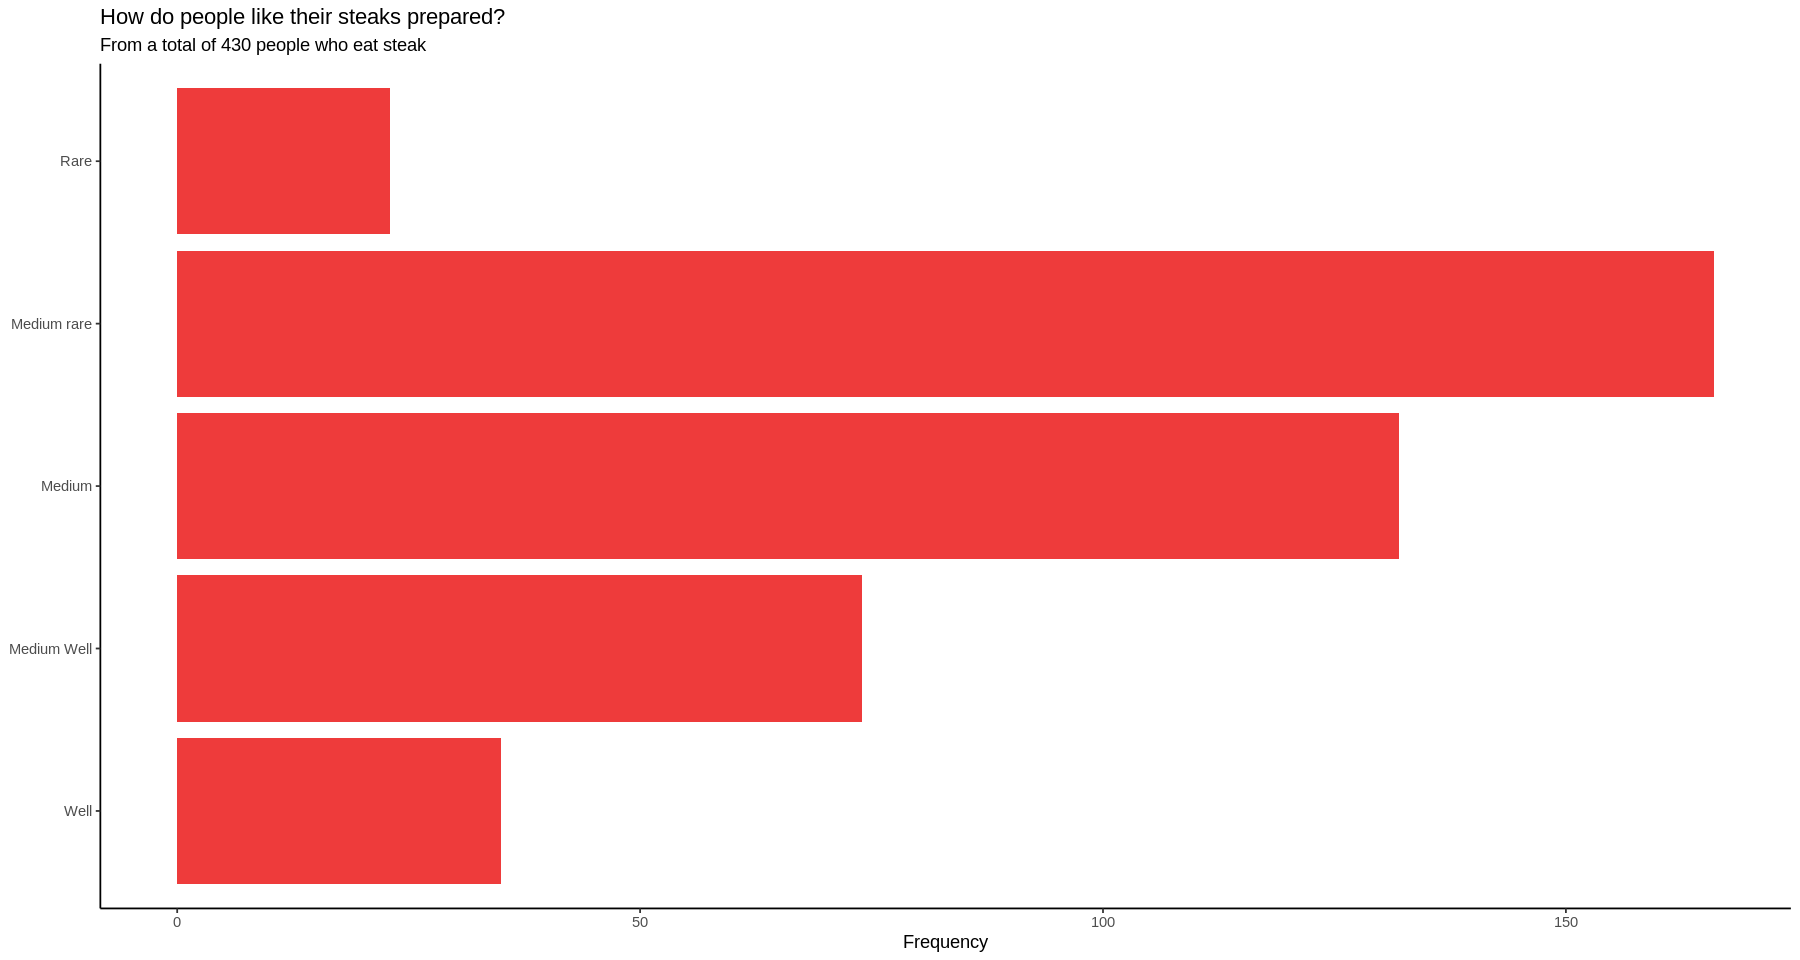

In [4]:
options(repr.plot.width = 15, repr.plot.height = 8)
p1 <- ggplot(steak, aes(x=`How do you like your steak prepared?` %>% fct_rev)) +
  geom_bar(fill = 'brown2') +
  coord_flip()+
  labs(title = 'How do people like their steaks prepared?',
       subtitle = 'From a total of 430 people who eat steak',
       x = NULL,
       y = 'Frequency') +
  theme_classic()
print(p1)

# Looking at Risky Behaviors

While looking at different risk behaviors, it seemed that there was not much of a difference between the behaviors and steak preference. We can take a look at different questions and plot them by filling in the bars. I wrote a function that allowed me to quickly plot the different questions. We can take a look below at the column names to view the questions. After that, I just have to insert the number which corresponds to the column of the question I want to examine.

In [5]:
colnames(steak) %>% as.tibble

Warning message:
“`as.tibble()` is deprecated as of tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


value
<chr>
RespondentID
"Consider the following hypothetical situations: <br>In Lottery A, you have a 50% chance of success, with a payout of $100. <br>In Lottery B, you have a 90% chance of success, with a payout of $20. <br><br>Assuming you have $10 to bet, would you play Lottery A or Lottery B?"
Do you ever smoke cigarettes?
Do you ever drink alcohol?
Do you ever gamble?
Have you ever been skydiving?
Do you ever drive above the speed limit?
Have you ever cheated on your significant other?
Do you eat steak?


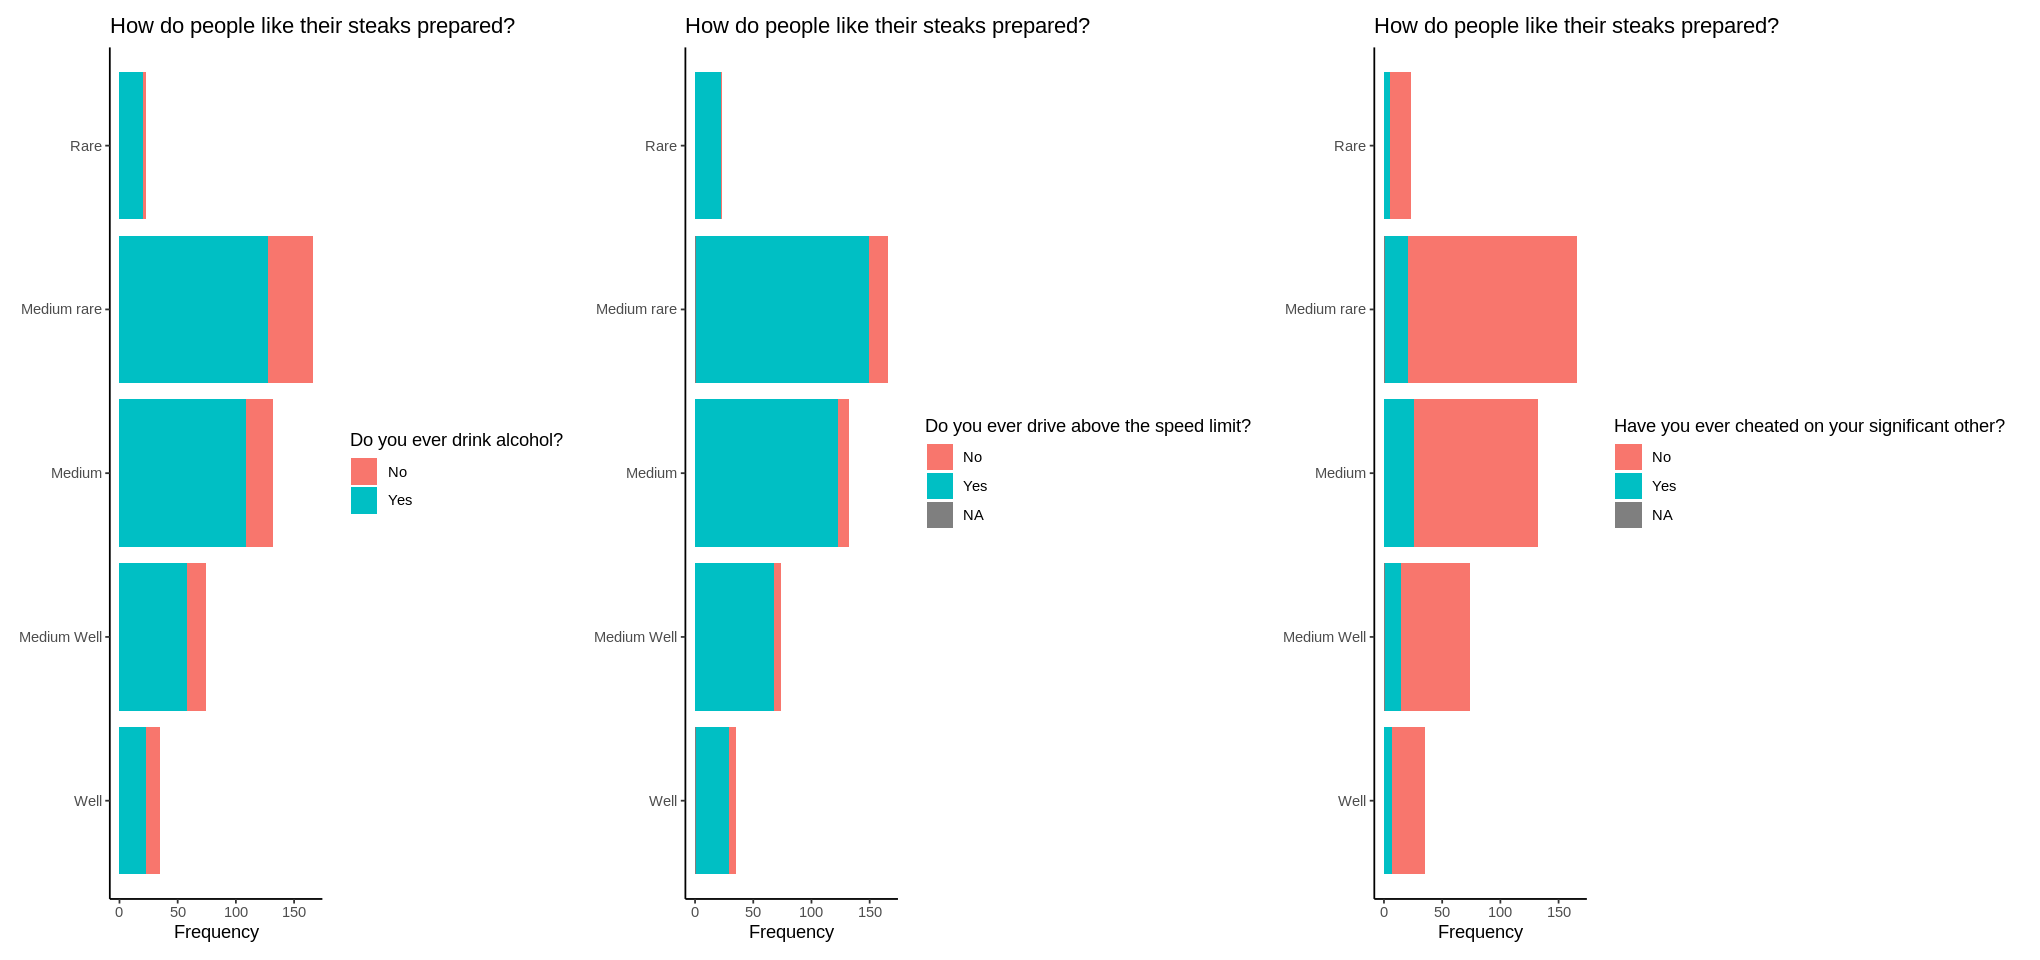

In [6]:
options(repr.plot.width = 17, repr.plot.height = 8)
plot <- function(n){
  ggplot(steak, aes(x=`How do you like your steak prepared?` %>% fct_rev, fill = get(colnames(steak)[n]))) +
    geom_bar() +
    coord_flip()+
    labs(title = 'How do people like their steaks prepared?',
         x = NULL,
         y = 'Frequency') +
    theme_classic() +
    guides(fill=guide_legend(title=colnames(steak)[n]))
}

p2 <- plot(4); p3 <- plot(7); p4 <- plot(8)

p2 + p3 + p4

Just by inspection, you can see that these select few questions (Alcohol, Gender, and Income) do not seem to impact the distribution too heavily. The only notable difference is for some questions, medium is closer to medium rare. Most still prefer medium rare followed by medium. This was the case for all of the tested questions.

# Looking at the Classiest People

Since there was not much of a change looking at a singular question, I decided to look at the classiest people and perhaps maybe I can fit in and feel fancy. So, I looked at those who made over $150,000 and had a Bachelor's or Graduate degree. There I could see that medium steaks had a majority, which is unfortunate for me since I prefer my steaks medium rare. 

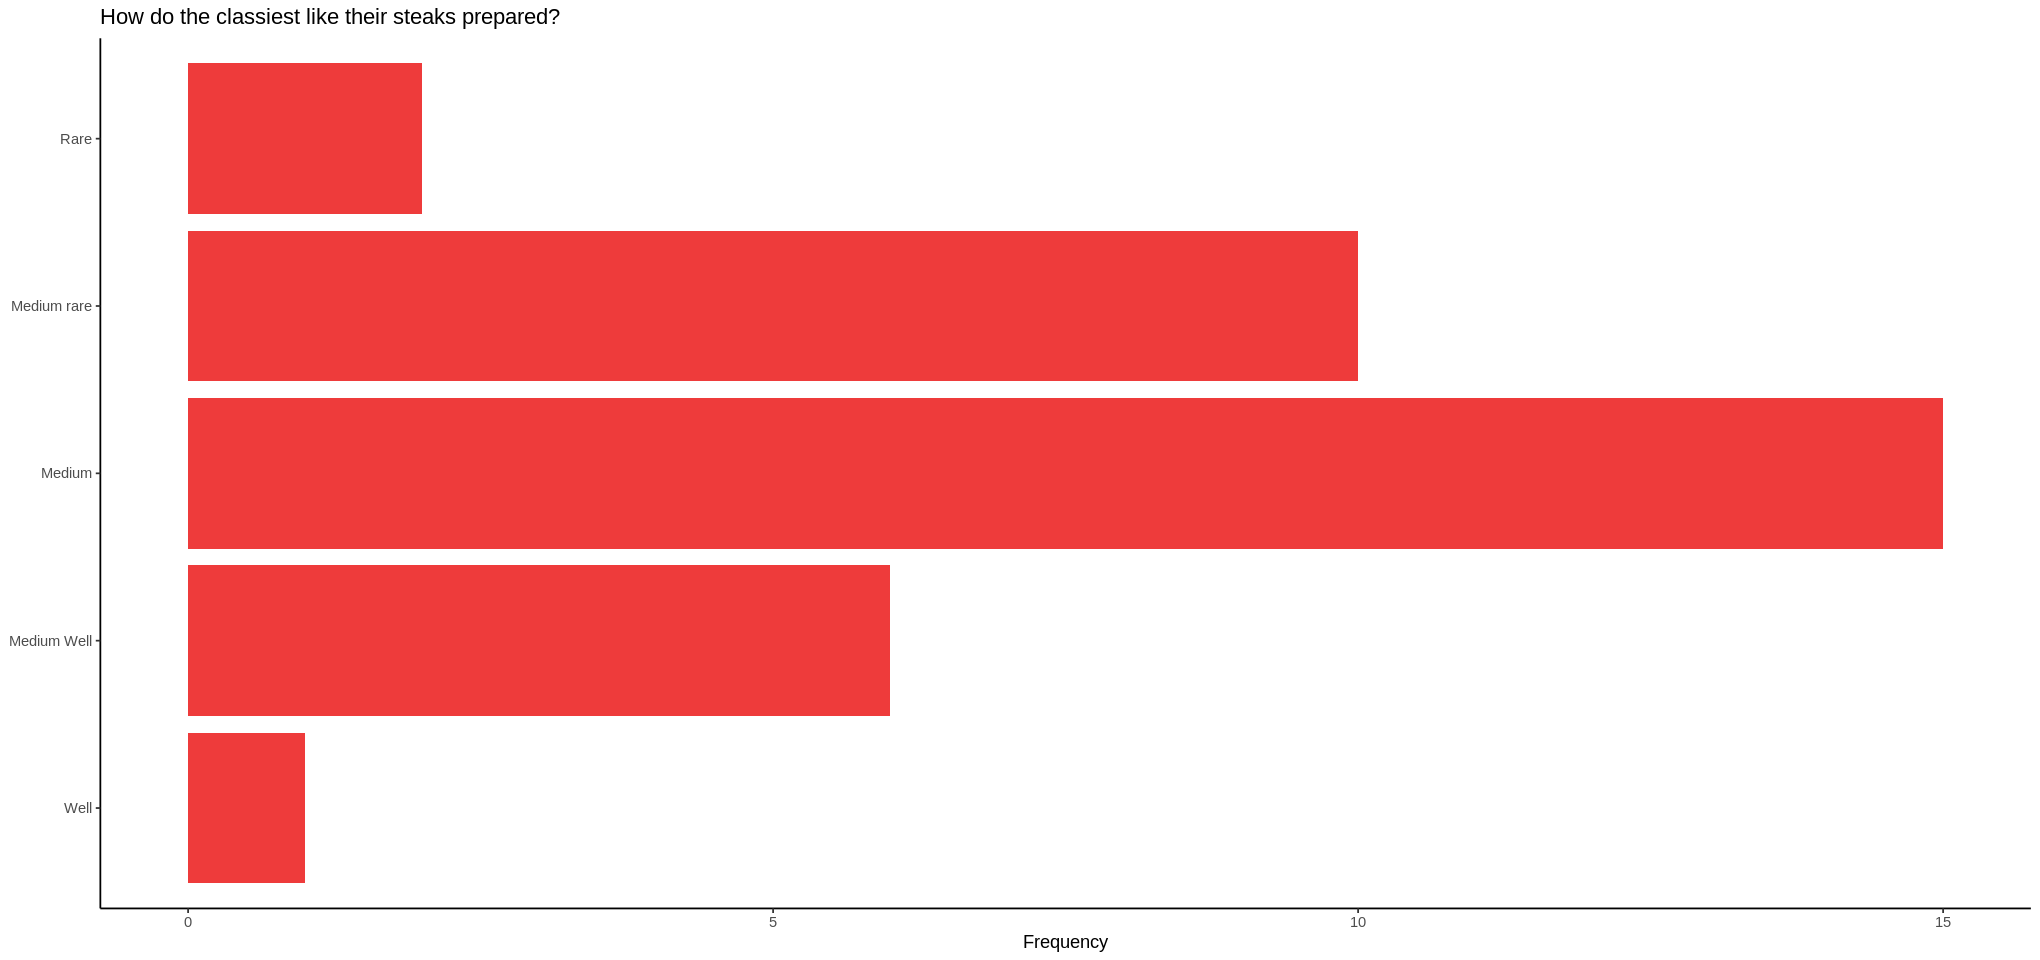

In [7]:
classy <- steak %>% filter(`Household Income` == "$150,000+", `Education` %in% c("Graduate degree", "Bachelor degree"))

p3 <- ggplot(classy, aes(x=`How do you like your steak prepared?` %>% fct_rev)) +
  geom_bar(fill = 'brown2')+
  coord_flip()+
  labs(title = 'How do the classiest like their steaks prepared?',
       x = NULL,
       y = 'Frequency') +
  theme_classic()
print(p3)